#first lets me inspect the give dataset

In [99]:
import pandas as pd
df_fear = pd.read_csv("fear_greed_index.csv")
df_historical = pd.read_csv("historical_data.csv")

In [21]:
df_fear.shape

(2644, 4)

# here it contains 4 columns and 2644 observations in fear_greed_index.csv

In [22]:
df_historical.shape

(211224, 17)

#here it contains 17 columns and 211224 observations in historical_data.csv

In [26]:
df_fear.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [27]:
df_hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


# **DATA PREPROCESSING**

In [88]:
import numpy  as np
from sklearn.preprocessing  import StandardScaler
from scipy import stats
from sklearn.pipeline import Pipeline

In [86]:
print(f"\n[Fear & Greed] Shape : {df_fear.shape}")
print(f"Columns  : {list(df_fear.columns)}")
print(f"Dtypes :\n{df_fear.dtypes}")
print(f"\nMissing values :\n{df_fear.isnull().sum()}")
print(f"Duplicate rows : {df_fear.duplicated().sum()}")
print(f"\nSample :")
print(df_fear.head(3).to_string())


[Fear & Greed] Shape : (2644, 5)
Columns  : ['timestamp', 'value', 'classification', 'date', 'sentiment']
Dtypes :
timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
sentiment                 object
dtype: object

Missing values :
timestamp         0
value             0
classification    0
date              0
sentiment         0
dtype: int64
Duplicate rows : 0

Sample :
    timestamp  value classification       date sentiment
0  1517463000     30           Fear 2018-02-01      Fear
1  1517549400     15   Extreme Fear 2018-02-02      Fear
2  1517635800     40           Fear 2018-02-03      Fear


## now lets we inspect Historical Trader(Hyperliquid) dataset:

In [29]:
print(f"\n\n[Hyperliquid] Shape : {df_hist.shape}")
print(f"Columns :\n{list(df_hist.columns)}")
print(f"\nDtypes :\n{df_hist.dtypes}")
print(f"\nMissing values :\n{df_hist.isnull().sum()}")
print(f"Duplicate rows : {df_hist.duplicated().sum()}")
print(f"\nSample :")
print(df_hist.head(3).to_string())



[Hyperliquid] Shape : (211224, 16)
Columns :
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Dtypes :
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

Missing values :
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID  

# okay now lets we Clean & convert Convert timestamps and align the datasets by date.

In [35]:
print("\n\n── Timestamp conversion ──")
# Fear & Greed: parse 'date' column
df_fear["date"] = pd.to_datetime(df_fear["date"])
df_fear = (df_fear
           .sort_values("date")
           .drop_duplicates("date")
           .reset_index(drop=True))

# Hyperliquid: Timestamp column is Unix milliseconds
df_hist["date"] = pd.to_datetime(df_hist["Timestamp"], unit="ms").dt.normalize()

print(f"F&G date range  : {df_fear['date'].min().date()} → {df_fear['date'].max().date()}")
print(f"Trade date range: {df_hist['date'].min().date()} → {df_hist['date'].max().date()}")



── Timestamp conversion ──
F&G date range  : 2018-02-01 → 2025-05-02
Trade date range: 2023-03-28 → 2025-06-15


#Sentiment label harmonisation

In [36]:
# Collapse 5-bucket classification to 3 (Fear / Neutral / Greed)
def broad_label(cls):
    if "Fear"  in str(cls): return "Fear"
    if "Greed" in str(cls): return "Greed"
    return "Neutral"

df_fear["sentiment"] = df_fear["classification"].apply(broad_label)

print("\nFear & Greed classification counts:")
print(df_fear["classification"].value_counts().to_string())
print("\nBroad sentiment counts:")
print(df_fear["sentiment"].value_counts().to_string())


Fear & Greed classification counts:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326

Broad sentiment counts:
sentiment
Fear       1289
Greed       959
Neutral     396


#now lets we Filter to relevant trade types only

In [38]:
# Keep only perpetuals directional trades that realise PnL
# Spot dust conversions, settlements etc. are not relevant
KEEP_DIRECTIONS = {
    "Open Long", "Close Long", "Open Short", "Close Short",
    "Long > Short", "Short > Long",
    "Liquidated Isolated Short", "Auto-Deleveraging",
}
df_hist_clean = df_hist[df_hist["Direction"].isin(KEEP_DIRECTIONS)].copy()
print(f"\nAfter filtering to perp trade directions: {len(df_hist_clean):,} rows "
      f"(removed {len(df_hist) - len(df_hist_clean):,})")


After filtering to perp trade directions: 174,463 rows (removed 36,761)


#Derive 'Side' from Direction

In [42]:
# 'Side' (BUY/SELL) represents the raw order execution side,
# not the actual position direction.
# For ratio analysis, we need the position direction (Long / Short).

def position_side(d):
    if d in ("Open Long",  "Long > Short"):
        return "Long"
    if d in ("Open Short", "Short > Long"):
        return "Short"
    if d in ("Close Long",):
        return "Long"   # Closing an existing long position
    if d in ("Close Short",):
        return "Short"  # Closing an existing short position
    return "Other"

df_hist_clean["pos_side"] = df_hist_clean["Direction"].apply(position_side)

In [49]:
# Hyperliquid data does not include a direct leverage column.
# We approximate leverage as:
# Size USD / (Start Position × Execution Price)
# only when Start Position > 0.
# Otherwise, we assign NaN.
# We cap leverage at 100× to remove obvious data artefacts or outliers.

df_hist_clean["leverage_proxy"] = np.where(
    df_hist_clean["Start Position"] > 0,
    df_hist_clean["Size USD"] / (
        df_hist_clean["Start Position"] * df_hist_clean["Execution Price"] + 1e-9
    ),
    np.nan
)

df_hist_clean["leverage_proxy"] = df_hist_clean["leverage_proxy"].clip(upper=100)

# ── A-8: Merge datasets on date ───
# here we Join trade history with Fear & Greed data using the date key.
# We use an inner join to retain only overlapping dates.

In [44]:
df_merged = df_hist_clean.merge(
    df_fear[["date", "value", "classification", "sentiment"]],
    on="date",
    how="inner"
)

# Basic sanity checks on merged dataset
print(f"\nMerged rows   : {len(df_merged):,}")
print(f"Merged days   : {df_merged['date'].nunique()}")
print(f"Merged traders: {df_merged['Account'].nunique()}")
print(f"Date range    : {df_merged['date'].min().date()} → {df_merged['date'].max().date()}")


Merged rows   : 151,578
Merged days   : 6
Merged traders: 32
Date range    : 2023-03-28 → 2025-02-19


# ── A-9 : Is-win flag ───────────────────
# here a trade is a "winner" when Closed PnL > 0 (accounting for fee).
# Only closing trades have non-zero PnL; opening trades = 0 → excluded from win-rate.

In [45]:
df_closed = df_merged[df_merged["Closed PnL"] != 0].copy()
df_closed["is_win"] = df_closed["Closed PnL"] > 0

print(f"\nClosed (PnL-realizing) trades: {len(df_closed):,}")


Closed (PnL-realizing) trades: 73,120


# ── A-10 : Engineer daily metrics per trader ───

In [46]:
print("\n── Engineering daily metrics ──")

daily = (
    df_closed
    .groupby(["Account", "date", "sentiment", "value"])
    .agg(
        daily_pnl      = ("Closed PnL",      "sum"),
        n_trades       = ("Closed PnL",       "count"),
        win_rate       = ("is_win",           "mean"),
        avg_size_usd   = ("Size USD",         "mean"),
        total_fee      = ("Fee",              "sum"),
        long_count     = ("pos_side", lambda x: (x == "Long").sum()),
        short_count    = ("pos_side", lambda x: (x == "Short").sum()),
        avg_leverage   = ("leverage_proxy",   "mean"),
    )
    .reset_index()
)

daily["pnl_net"]       = daily["daily_pnl"] - daily["total_fee"]
daily["ls_ratio"]      = daily["long_count"] / (daily["short_count"] + 1e-9)
daily["ls_ratio"]      = daily["ls_ratio"].clip(upper=20)  # cap extreme values

print(f"Daily trader-day records: {len(daily):,}")
print(f"Sample daily metrics:")
print(daily.head(5).to_string())


── Engineering daily metrics ──
Daily trader-day records: 67
Sample daily metrics:
                                      Account       date sentiment  value     daily_pnl  n_trades  win_rate  avg_size_usd    total_fee  long_count  short_count  avg_leverage       pnl_net   ls_ratio
0  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-10-27     Greed     74 -3.275059e+05       139  0.086331  22298.920504   368.007449           0          139           NaN -3.278739e+05   0.000000
1  0x083384f897ee0f19899168e3b1bec365f52a9012 2025-02-19      Fear     44  1.927736e+06      1593  0.854363  17010.654055  3276.334628         296         1297      0.059116  1.924459e+06   0.228219
2  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd 2024-10-27     Greed     74  1.245519e+03        21  1.000000   8166.333810    60.022546          21            0      0.157732  1.185496e+03  20.000000
3  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd 2025-02-19      Fear     44  7.611542e+02       406  0.852217   1734.43108

# ── A-11 : Trader-level aggregate stats ────

In [50]:
trader = (
    df_closed
    .groupby("Account")
    .agg(
        total_pnl      = ("Closed PnL",      "sum"),
        total_trades   = ("Closed PnL",       "count"),
        avg_win_rate   = ("is_win",           "mean"),
        avg_size_usd   = ("Size USD",         "mean"),
        avg_leverage   = ("leverage_proxy",   "mean"),
        active_days    = ("date",             "nunique"),
        total_fee      = ("Fee",              "sum"),
    )
    .reset_index()
)
trader["pnl_net"]      = trader["total_pnl"] - trader["total_fee"]
trader["trades_per_day"] = trader["total_trades"] / trader["active_days"]

# Okay now lets we drawdown proxy per trader: rolling minimum daily_pnl

In [51]:
def max_drawdown_proxy(acct_daily):
    cumsum = acct_daily["daily_pnl"].cumsum()
    roll_max = cumsum.cummax()
    dd = (cumsum - roll_max).min()
    return dd

trader_dd = (
    daily.sort_values(["Account","date"])
    .groupby("Account")
    .apply(max_drawdown_proxy, include_groups=False)
    .reset_index()
    .rename(columns={0: "max_drawdown"})
)
trader = trader.merge(trader_dd, on="Account", how="left")

print(f"\nTrader-level records: {len(trader)}")
print(trader.describe().to_string())


Trader-level records: 32
          total_pnl  total_trades  avg_win_rate  avg_size_usd  avg_leverage  active_days     total_fee       pnl_net  trades_per_day  max_drawdown
count  3.200000e+01     32.000000     32.000000     32.000000     32.000000    32.000000     32.000000  3.200000e+01       32.000000     32.000000
mean   2.293714e+05   2285.000000      0.866690   7508.099865      0.210153     2.093750   2751.770478  2.266196e+05     1244.315625   -818.973271
std    3.399177e+05   2820.584382      0.133017   8361.137827      0.198151     0.928383   4610.343481  3.390343e+05     1948.826148   4593.620930
min   -1.439215e+04      6.000000      0.333333    586.970751      0.009707     1.000000      8.256784 -1.444003e+04        3.000000 -25991.506339
25%    2.120137e+04    380.750000      0.808798   2004.186208      0.075864     2.000000    270.555448  1.605995e+04      165.750000      0.000000
50%    8.397208e+04   1064.000000      0.872942   3546.445288      0.157772     2.000000   1

# **PART B — Data Analysis & Visualization**

#B1: Helper for significance testing
#here I Performs a two-sided Mann–Whitney U test to compare two samples (after dropping NaN values) and computes the rank-biserial correlation as the effect size. Returns the p-value and the corresponding effect size, and prints a formatted summary including sample sizes and medians.

In [52]:
def mwu_test(a, b, label_a="A", label_b="B"):
    """Mann-Whitney U test + effect size (rank-biserial r)."""
    a, b = a.dropna(), b.dropna()
    u, p = stats.mannwhitneyu(a, b, alternative="two-sided")
    n1, n2 = len(a), len(b)
    r = 1 - (2 * u) / (n1 * n2)   # rank-biserial correlation
    sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "ns"
    print(f"  {label_a} vs {label_b}: n=({n1},{n2}), "
          f"median=({a.median():.3f}, {b.median():.3f}), "
          f"p={p:.4f} {sig}, effect-r={r:.3f}")
    return p, r

 # B-1: Performance by sentiment regime
 # here it aggregates trader-day performance metrics by sentiment regime (Fear, Neutral, Greed), formats the results into publication-ready values (rounded PnL and percentage win rates), renames columns for clarity, and prints a clean summary table for reporting.

In [53]:
print("\n── B1: Performance by Sentiment ──")

sent_stats = (
    daily.groupby("sentiment")
    .agg(
        TraderDays   = ("daily_pnl",  "count"),
        MeanPnL      = ("daily_pnl",  "mean"),
        MedianPnL    = ("daily_pnl",  "median"),
        MeanWinRate  = ("win_rate",   "mean"),
        MedianWinRate= ("win_rate",   "median"),
        PnL_Std      = ("daily_pnl",  "std"),
    )
    .reindex(["Fear", "Neutral", "Greed"])
)

# Format for publication-style output
sent_table = sent_stats.copy()
sent_table["MeanPnL"]        = sent_table["MeanPnL"].round(2)
sent_table["MedianPnL"]      = sent_table["MedianPnL"].round(2)
sent_table["PnL_Std"]        = sent_table["PnL_Std"].round(2)
sent_table["MeanWinRate"]    = (sent_table["MeanWinRate"] * 100).round(2)
sent_table["MedianWinRate"]  = (sent_table["MedianWinRate"] * 100).round(2)

# Rename columns for presentation
sent_table.columns = [
    "Trader-Days",
    "Mean PnL",
    "Median PnL",
    "Mean Win Rate (%)",
    "Median Win Rate (%)",
    "PnL Std Dev"
]

print("\nSentiment Performance Summary (Formatted):")
print(sent_table.to_string())


── B1: Performance by Sentiment ──

Sentiment Performance Summary (Formatted):
           Trader-Days   Mean PnL  Median PnL  Mean Win Rate (%)  Median Win Rate (%)  PnL Std Dev
sentiment                                                                                         
Fear                30  215939.90    84592.18              89.67                91.46    387655.57
Neutral              7   22433.05       -1.00              54.86                74.25     60988.84
Greed               30   23488.50     8672.28              81.35                95.04     95148.33


In [56]:
print("\nStatistical significance tests (daily PnL):")
fear_pnl   = daily.loc[daily["sentiment"] == "Fear",   "daily_pnl"]
greed_pnl  = daily.loc[daily["sentiment"] == "Greed",  "daily_pnl"]
neutral_pnl= daily.loc[daily["sentiment"] == "Neutral","daily_pnl"]
mwu_test(fear_pnl, greed_pnl,   "Fear",    "Greed")
mwu_test(fear_pnl, neutral_pnl, "Fear",    "Neutral")
mwu_test(greed_pnl,neutral_pnl, "Greed",   "Neutral")

print("\nStatistical significance tests (win rate):")
mwu_test(daily.loc[daily["sentiment"]=="Fear",  "win_rate"],
         daily.loc[daily["sentiment"]=="Greed", "win_rate"], "Fear-WR", "Greed-WR")


Statistical significance tests (daily PnL):
  Fear vs Greed: n=(30,30), median=(84592.183, 8672.281), p=0.0001 ***, effect-r=-0.582
  Fear vs Neutral: n=(30,7), median=(84592.183, -1.000), p=0.0043 **, effect-r=-0.676
  Greed vs Neutral: n=(30,7), median=(8672.281, -1.000), p=0.1276 ns, effect-r=-0.381

Statistical significance tests (win rate):
  Fear-WR vs Greed-WR: n=(30,30), median=(0.915, 0.950), p=0.9643 ns, effect-r=0.008


(np.float64(0.9642840079900787), np.float64(0.007777777777777772))

# Drawdown proxy per sentiment

In [57]:
print("\nAverage max-drawdown proxy by sentiment (via daily cumPnL):")
dd_by_sent = (
    daily.groupby(["Account","sentiment"])["daily_pnl"]
    .apply(lambda x: (x.cumsum() - x.cumsum().cummax()).min())
    .reset_index()
    .rename(columns={"daily_pnl": "dd"})
    .groupby("sentiment")["dd"]
    .agg(["mean","median"])
    .reindex(["Fear","Neutral","Greed"])
)
print(dd_by_sent.round(2).to_string())


Average max-drawdown proxy by sentiment (via daily cumPnL):
           mean  median
sentiment              
Fear        0.0     0.0
Neutral     0.0     0.0
Greed       0.0     0.0


# B2 : Behavior changes by sentiment
# here it summarizes average trader behavior metrics (trade frequency, leverage, position size, and long/short ratio) by sentiment regime, prints the table, and then performs Mann–Whitney U tests comparing Fear vs Greed days for leverage, trading frequency, and position size to assess statistical significance.

In [59]:
behav_stats = (
    daily.groupby("sentiment")
    .agg(
        avg_n_trades   = ("n_trades",     "mean"),
        avg_leverage   = ("avg_leverage", "mean"),
        avg_size_usd   = ("avg_size_usd", "mean"),
        avg_ls_ratio   = ("ls_ratio",     "mean"),
    )
    .reindex(["Fear","Neutral","Greed"])
    .round(3)
)
print("\nBehavior Metrics by Sentiment:")
print(behav_stats.to_string())

print("\nStatistical tests (leverage):")
mwu_test(
    daily.loc[daily["sentiment"]=="Fear",  "avg_leverage"],
    daily.loc[daily["sentiment"]=="Greed", "avg_leverage"],
    "Fear-Lev", "Greed-Lev"
)
print("Statistical tests (trade frequency):")
mwu_test(
    daily.loc[daily["sentiment"]=="Fear",  "n_trades"],
    daily.loc[daily["sentiment"]=="Greed", "n_trades"],
    "Fear-Freq", "Greed-Freq"
)
print("Statistical tests (position size):")
mwu_test(
    daily.loc[daily["sentiment"]=="Fear",  "avg_size_usd"],
    daily.loc[daily["sentiment"]=="Greed", "avg_size_usd"],
    "Fear-Size", "Greed-Size"
)


Behavior Metrics by Sentiment:
           avg_n_trades  avg_leverage  avg_size_usd  avg_ls_ratio
sentiment                                                        
Fear           1894.933         0.195      7073.076         5.192
Neutral         385.000         0.456     14114.739         6.309
Greed           452.567         0.357      7252.163         7.829

Statistical tests (leverage):
  Fear-Lev vs Greed-Lev: n=(29,25), median=(0.119, 0.263), p=0.0012 **, effect-r=0.517
Statistical tests (trade frequency):
  Fear-Freq vs Greed-Freq: n=(30,30), median=(1279.000, 91.500), p=0.0001 ***, effect-r=-0.600
Statistical tests (position size):
  Fear-Size vs Greed-Size: n=(30,30), median=(3045.618, 4794.437), p=0.4553 ns, effect-r=0.113


(np.float64(0.4552969069031376), np.float64(0.11333333333333329))

# B3 : Trader Segmentation
# here it creates three trader segmentation schemes based on average leverage (Low/Mid/High), trading frequency (Infrequent/Moderate/Frequent), and PnL consistency (via coefficient of variation), prints the segment distributions, merges the segment labels back into the daily dataset, and then reports mean, median, and count of daily PnL for each segment across sentiment regimes.

In [63]:
# Segment 1 — Leverage (based on each trader's median leverage proxy)
lev_q = trader["avg_leverage"].quantile([0.33, 0.67])
trader["lev_seg"] = pd.cut(
    trader["avg_leverage"],
    bins=[-np.inf, lev_q[0.33], lev_q[0.67], np.inf],
    labels=["Low Lev", "Mid Lev", "High Lev"]
)

# Segment 2 — Frequency
freq_q = trader["trades_per_day"].quantile([0.33, 0.67])
trader["freq_seg"] = pd.cut(
    trader["trades_per_day"],
    bins=[-np.inf, freq_q[0.33], freq_q[0.67], np.inf],
    labels=["Infrequent", "Moderate", "Frequent"]
)

# Segment 3 — Consistency (coefficient of variation of daily PnL)
cv_daily = (
    daily.groupby("Account")["daily_pnl"]
    .apply(lambda x: x.std() / (abs(x.mean()) + 1e-9))
    .reset_index()
    .rename(columns={"daily_pnl": "pnl_cv"})
)
trader = trader.merge(cv_daily, on="Account", how="left")

cv_q = trader["pnl_cv"].quantile([0.33, 0.67])
trader["consistency_seg"] = pd.cut(
    trader["pnl_cv"],
    bins=[-np.inf, cv_q[0.33], cv_q[0.67], np.inf],
    labels=["Consistent", "Moderate", "Inconsistent"]
)

print("Leverage segment counts:\n", trader["lev_seg"].value_counts().to_string())
print("\nFrequency segment counts:\n", trader["freq_seg"].value_counts().to_string())
print("\nConsistency segment counts:\n", trader["consistency_seg"].value_counts().to_string())

# Merge segments back into daily
daily = daily.merge(
    trader[["Account","lev_seg","freq_seg","consistency_seg","pnl_cv"]],
    on="Account", how="left"
)

# Segment performance by sentiment
for seg_col, seg_label in [
    ("lev_seg",          "Leverage Segment"),
    ("freq_seg",         "Frequency Segment"),
    ("consistency_seg",  "Consistency Segment"),
]:
    tbl = (
        daily.groupby([seg_col, "sentiment"])["daily_pnl"]
        .agg(["mean","median","count"])
        .round(2)
        .unstack("sentiment")
    )
    print(f"\n{seg_label} × Sentiment  —  Daily PnL:")
    print(tbl.to_string())

Leverage segment counts:
 lev_seg
Low Lev     11
High Lev    11
Mid Lev     10

Frequency segment counts:
 freq_seg
Infrequent    11
Frequent      11
Moderate      10

Consistency segment counts:
 consistency_seg
Moderate        9
Consistent      8
Inconsistent    8

Leverage Segment × Sentiment  —  Daily PnL:
                mean                         median                     count              
sentiment       Fear     Greed   Neutral       Fear     Greed   Neutral  Fear Greed Neutral
lev_seg                                                                                    
Low Lev    369366.43  14938.17  72781.22  100502.42   6595.97  72781.22    11     8       2
Mid Lev     66040.29  38130.57      0.16   39819.36   8705.19      0.16    10     9       1
High Lev   194973.70  18613.43   2867.18  183403.02  11671.68 -11650.83     9    13       4

Frequency Segment × Sentiment  —  Daily PnL:
                 mean                         median                     count            

# Now lets we visualize PART A + PART B

In [60]:
import matplotlib.pyplot    as plt
import matplotlib.patches   as mpatches
import matplotlib.gridspec  as gridspec
import seaborn  as sns
from scipy      import stats
from sklearn.preprocessing  import StandardScaler
from sklearn.cluster        import KMeans
from sklearn.ensemble       import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics        import classification_report, roc_auc_score
from sklearn.pipeline       import Pipeline

# This section defines the global visualization style for all plots by setting Matplotlib defaults such as background colors, grid appearance, fonts, and axis formatting. It also establishes a consistent color palette for sentiment regimes (Fear, Neutral, Greed) to ensure visual coherence across figures.

In [61]:
# ── visual style ─────────────────────────────────────────────
plt.rcParams.update({
    "figure.facecolor" : "#F8F9FA",
    "axes.facecolor"   : "white",
    "axes.edgecolor"   : "#CCCCCC",
    "grid.color"       : "#EEEEEE",
    "font.family"      : "DejaVu Sans",
    "axes.spines.top"  : False,
    "axes.spines.right": False,
})
FEAR_C   = "#E74C3C"
GREED_C  = "#27AE60"
NEUT_C   = "#F39C12"
BLUE     = "#2980B9"
PURPLE   = "#8E44AD"
DARK     = "#2C3E50"
PALETTE  = {"Fear": FEAR_C, "Neutral": NEUT_C, "Greed": GREED_C}

# Fig1 - here it generates a bar chart of the full historical Crypto Fear & Greed Index, coloring each day according to sentiment regime (Fear < 40, Neutral 40–60, Greed > 60), adds horizontal threshold lines at 40 and 60, formats the title and legend, and then saves the figure as fig1_fg_timeline.png before displaying it.

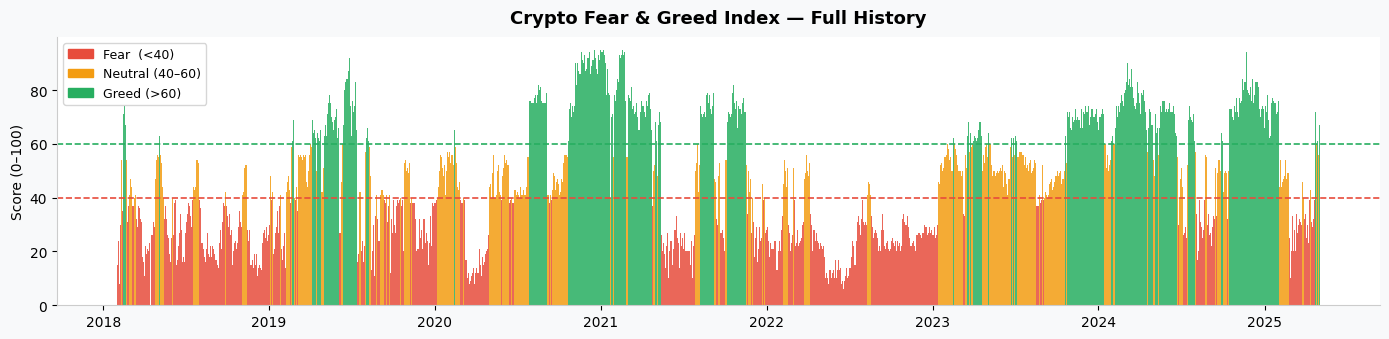

Saved fig1_fg_timeline.png


In [64]:
fig, ax = plt.subplots(figsize=(14, 3.5))
colors = [FEAR_C if v < 40 else GREED_C if v > 60 else NEUT_C for v in df_fear["value"]]
ax.bar(df_fear["date"], df_fear["value"], color=colors, width=1, alpha=0.85)
ax.axhline(40, ls="--", lw=1.2, color=FEAR_C, label="Fear threshold (40)")
ax.axhline(60, ls="--", lw=1.2, color=GREED_C, label="Greed threshold (60)")
ax.set_title("Crypto Fear & Greed Index — Full History", fontsize=13, fontweight="bold", pad=10)
ax.set_ylabel("Score (0–100)")
legend_patches = [
    mpatches.Patch(color=FEAR_C,  label="Fear  (<40)"),
    mpatches.Patch(color=NEUT_C,  label="Neutral (40–60)"),
    mpatches.Patch(color=GREED_C, label="Greed (>60)"),
]
ax.legend(handles=legend_patches, loc="upper left", fontsize=9, framealpha=0.8)
plt.tight_layout()
plt.savefig("fig1_fg_timeline.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved fig1_fg_timeline.png")

# Fig2 -here create three side-by-side histograms showing the distribution of trader daily PnL under Fear, Neutral, and Greed regimes, clipping extreme outliers (1st–99th percentile), marking the mean and median for each, and saving the figure as fig2_pnl_distributions.png.

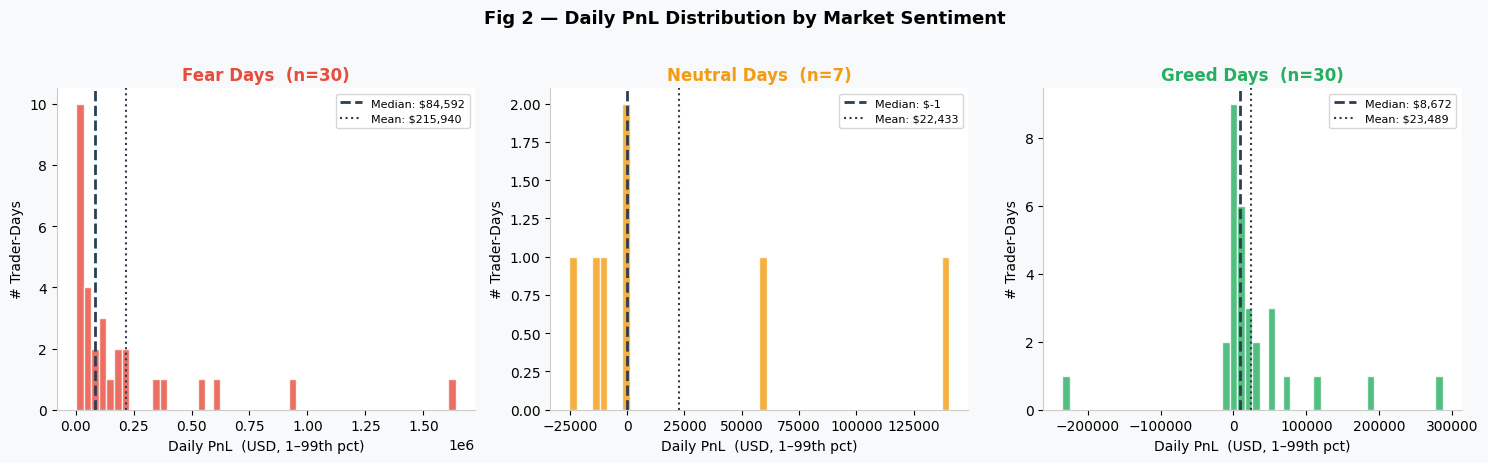

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4.5), sharey=False)
sent_order = ["Fear", "Neutral", "Greed"]
colors_s   = [FEAR_C, NEUT_C, GREED_C]

for ax, sent, col in zip(axes, sent_order, colors_s):
    data = daily[daily["sentiment"] == sent]["daily_pnl"]
    q1, q99 = data.quantile(0.01), data.quantile(0.99)
    clipped = data.clip(q1, q99)
    ax.hist(clipped, bins=50, color=col, alpha=0.8, edgecolor="white")
    ax.axvline(data.median(), color=DARK, lw=2,   ls="--",
               label=f"Median: ${data.median():,.0f}")
    ax.axvline(data.mean(),   color=DARK, lw=1.5, ls=":",
               label=f"Mean: ${data.mean():,.0f}")
    ax.set_title(f"{sent} Days  (n={len(data):,})", fontweight="bold", color=col)
    ax.set_xlabel("Daily PnL  (USD, 1–99th pct)")
    ax.set_ylabel("# Trader-Days")
    ax.legend(fontsize=8)

fig.suptitle("Fig 2 — Daily PnL Distribution by Market Sentiment",
             fontsize=13, fontweight="bold", y=1.02)
plt.tight_layout()
plt.savefig("fig2_pnl_distributions.png", dpi=150, bbox_inches="tight")
plt.show()

# Fig3 - here it creates a two-panel figure: the first bar chart shows the average trader win rate (in %) by sentiment regime, and the second displays the average maximum drawdown proxy (mean per-trader cumulative PnL drawdown) by sentiment, then saves the result as fig3_winrate_drawdown.png.

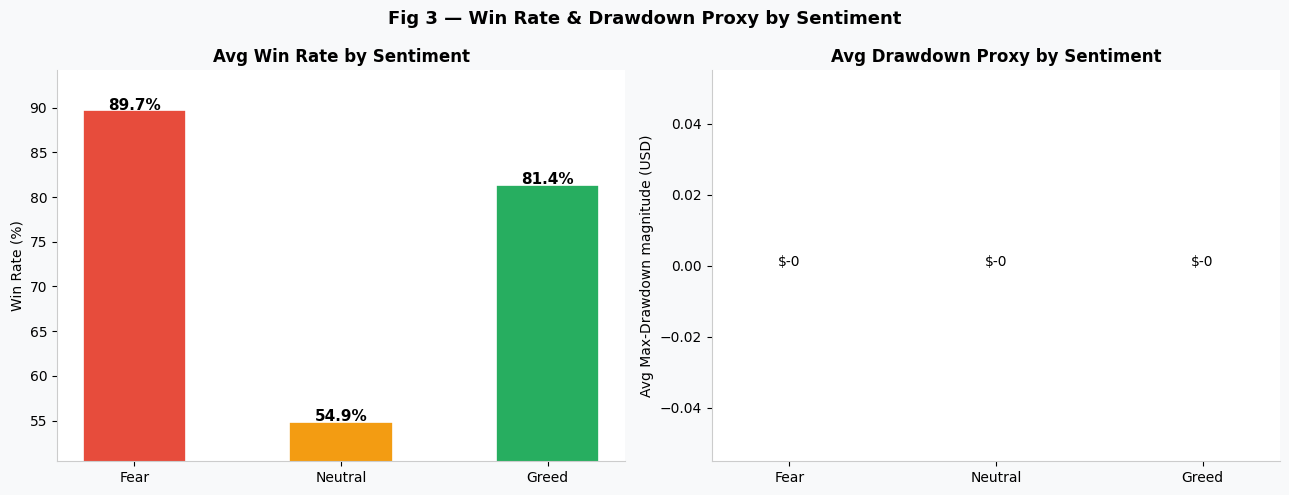

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

wr = (daily.groupby("sentiment")["win_rate"].mean() * 100).reindex(sent_order)
bars = axes[0].bar(wr.index, wr.values,
                   color=colors_s, width=0.5, edgecolor="white", linewidth=1.2)
axes[0].set_ylim(wr.min() * 0.92, wr.max() * 1.05)
axes[0].set_ylabel("Win Rate (%)")
axes[0].set_title("Avg Win Rate by Sentiment", fontweight="bold")
for bar, val in zip(bars, wr.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                 f"{val:.1f}%", ha="center", fontweight="bold", fontsize=11)

# Drawdown per trader per sentiment  (mean max-DD)
dd_tbl = (
    daily.groupby(["Account","sentiment"])["daily_pnl"]
    .apply(lambda x: (x.cumsum() - x.cumsum().cummax()).min())
    .reset_index().rename(columns={"daily_pnl":"dd"})
    .groupby("sentiment")["dd"].mean()
    .reindex(sent_order)
)
bars2 = axes[1].bar(dd_tbl.index, -dd_tbl.values,
                    color=colors_s, width=0.5, edgecolor="white")
axes[1].set_ylabel("Avg Max-Drawdown magnitude (USD)")
axes[1].set_title("Avg Drawdown Proxy by Sentiment", fontweight="bold")
for bar, val in zip(bars2, -dd_tbl.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.01,
                 f"${val:,.0f}", ha="center", fontsize=10)

fig.suptitle("Fig 3 — Win Rate & Drawdown Proxy by Sentiment",
             fontsize=13, fontweight="bold")
plt.tight_layout()
plt.savefig("fig3_winrate_drawdown.png", dpi=150, bbox_inches="tight")
plt.show()

# here it generates a 2×2 panel of bar charts showing average trader behavior metrics (leverage proxy, number of trades, position size, and long/short ratio) across Fear, Neutral, and Greed regimes, then saves the figure as fig4_behavior.png.

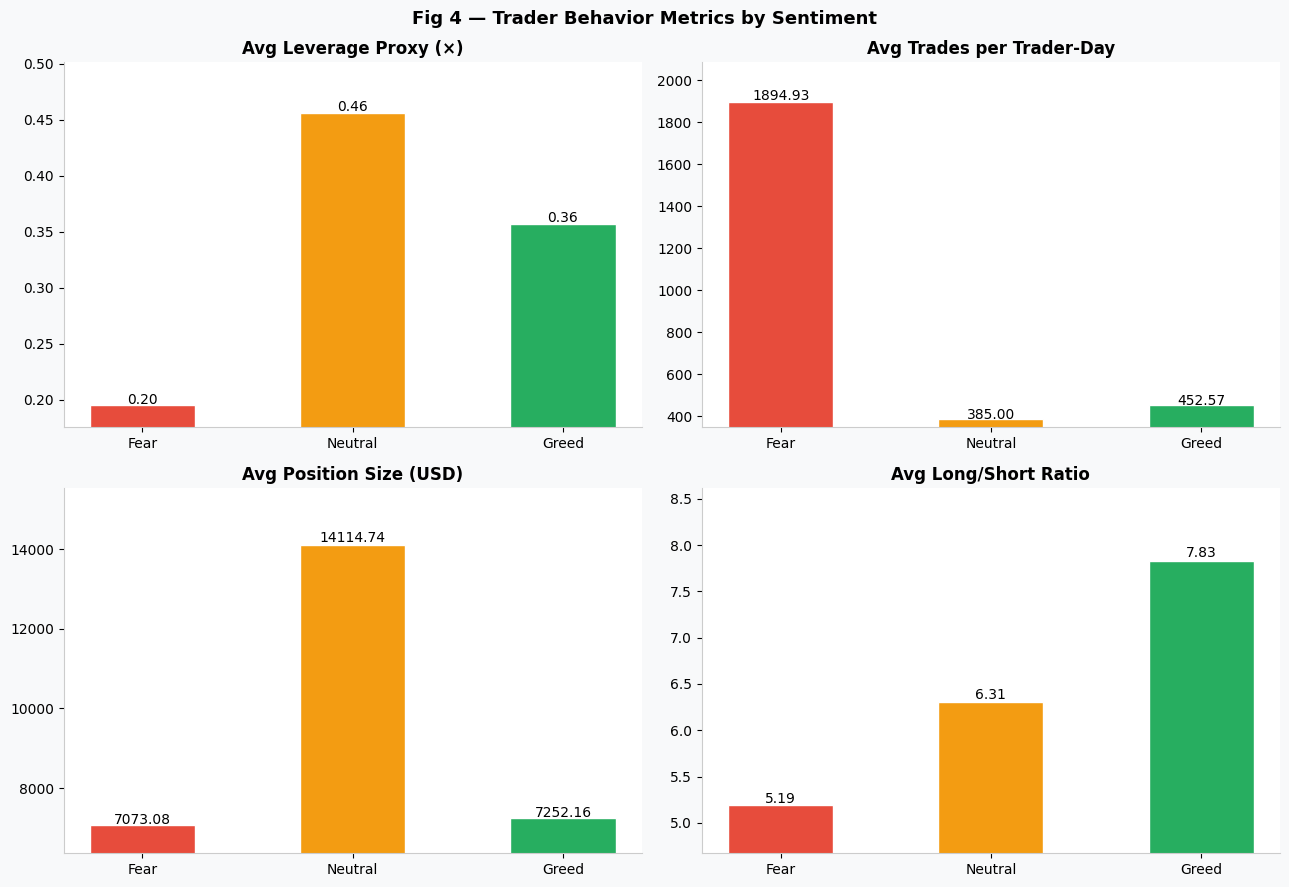

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
behavior_metrics = [
    ("avg_leverage",  "Avg Leverage Proxy (×)"),
    ("n_trades",      "Avg Trades per Trader-Day"),
    ("avg_size_usd",  "Avg Position Size (USD)"),
    ("ls_ratio",      "Avg Long/Short Ratio"),
]
for ax, (col, title) in zip(axes.flatten(), behavior_metrics):
    grp = daily.groupby("sentiment")[col].mean().reindex(sent_order)
    bars = ax.bar(grp.index, grp.values,
                  color=colors_s, width=0.5, edgecolor="white")
    ax.set_title(title, fontweight="bold")
    ax.set_ylim(grp.min() * 0.90, grp.max() * 1.10)
    for bar, val in zip(bars, grp.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.005,
                f"{val:.2f}", ha="center", fontsize=10)

fig.suptitle("Fig 4 — Trader Behavior Metrics by Sentiment",
             fontsize=13, fontweight="bold")
plt.tight_layout()
plt.savefig("fig4_behavior.png", dpi=150, bbox_inches="tight")
plt.show()

# here it creates three heatmaps showing the average daily PnL across trader segments (Leverage, Frequency, and Consistency) and sentiment regimes, highlighting performance differences by segment–sentiment interaction, and saves the figure as fig5_segment_heatmaps.png.

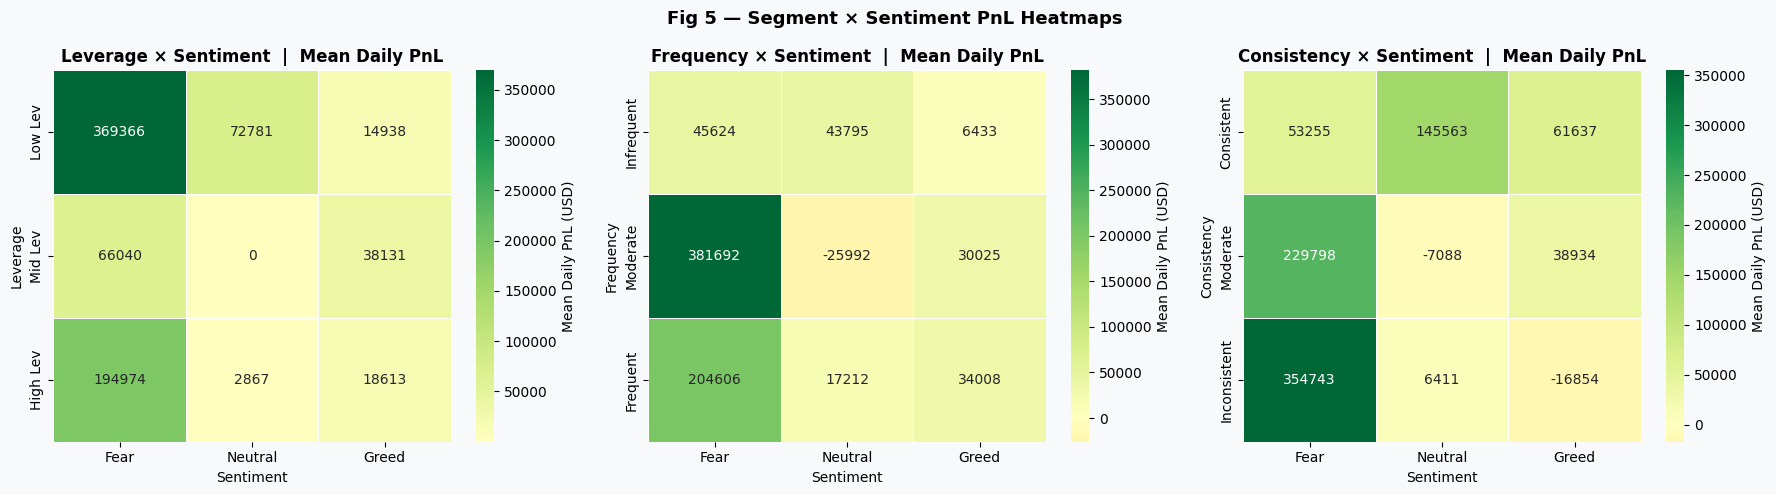

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
seg_cols   = ["lev_seg",   "freq_seg",    "consistency_seg"]
seg_labels = ["Leverage",  "Frequency",   "Consistency"]

for ax, scol, slabel in zip(axes, seg_cols, seg_labels):
    pivot = (
        daily.groupby([scol, "sentiment"])["daily_pnl"]
        .mean()
        .unstack("sentiment")
        .reindex(columns=sent_order)
    )
    sns.heatmap(pivot, ax=ax, annot=True, fmt=".0f",
                cmap="RdYlGn", center=0, linewidths=0.5,
                cbar_kws={"label": "Mean Daily PnL (USD)"})
    ax.set_title(f"{slabel} × Sentiment  |  Mean Daily PnL", fontweight="bold")
    ax.set_xlabel("Sentiment")
    ax.set_ylabel(slabel)

fig.suptitle("Fig 5 — Segment × Sentiment PnL Heatmaps",
             fontsize=13, fontweight="bold")
plt.tight_layout()
plt.savefig("fig5_segment_heatmaps.png", dpi=150, bbox_inches="tight")
plt.show()

# here it overlays normalized histograms of trader average leverage on Fear and Greed days (with extreme values clipped at the 99th percentile), marks each regime’s median leverage, and saves the comparison plot as fig6_leverage_dist.png.

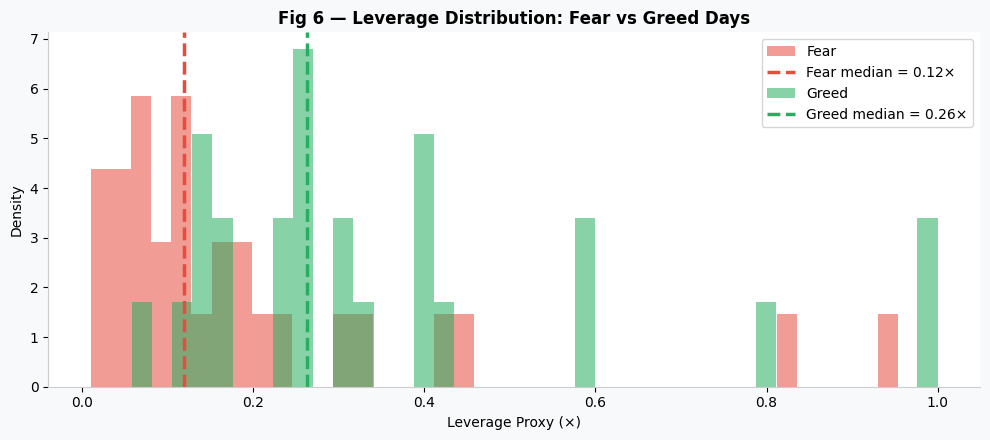

In [69]:
fig, ax = plt.subplots(figsize=(10, 4.5))
for sent, col in zip(["Fear","Greed"], [FEAR_C, GREED_C]):
    data = daily[daily["sentiment"] == sent]["avg_leverage"].dropna()
    data = data[data > 0].clip(upper=data.quantile(0.99))
    ax.hist(data, bins=40, alpha=0.55, color=col, label=sent, density=True)
    ax.axvline(data.median(), color=col, lw=2.5, ls="--",
               label=f"{sent} median = {data.median():.2f}×")
ax.set_xlabel("Leverage Proxy (×)")
ax.set_ylabel("Density")
ax.set_title("Fig 6 — Leverage Distribution: Fear vs Greed Days", fontweight="bold")
ax.legend()
plt.tight_layout()
plt.savefig("fig6_leverage_dist.png", dpi=150, bbox_inches="tight")
plt.show()

# here it creates a two-panel figure: the first panel shows a horizontal bar chart of the top 10 traders ranked by net PnL, and the second displays a scatter plot of all traders’ average win rate versus net PnL (colored by trades per day), then saves the figure as fig7_trader_overview.png.

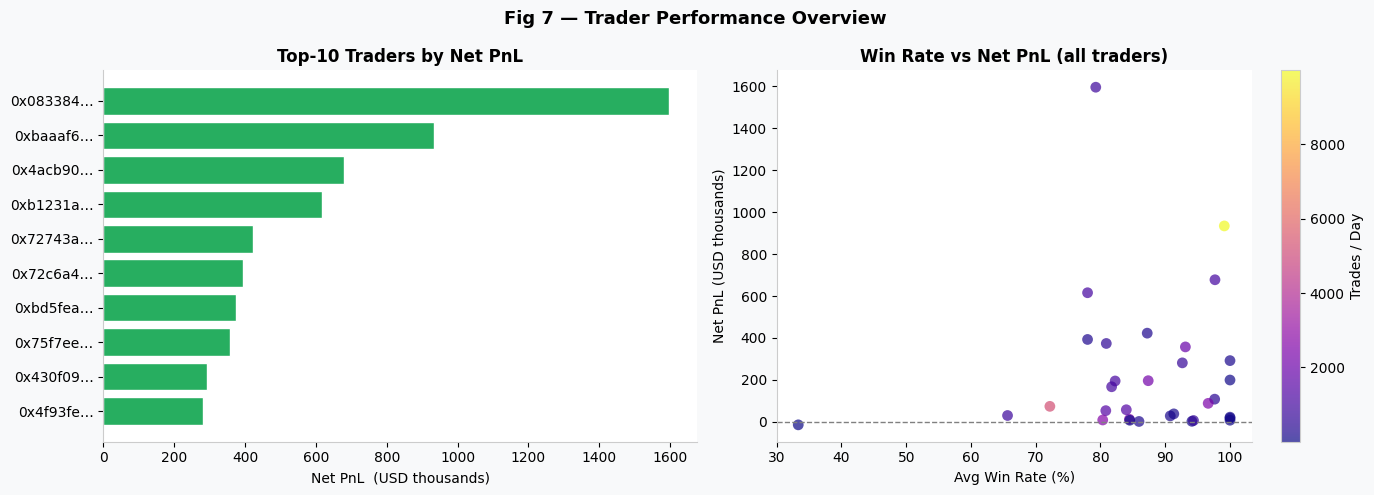

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

top10 = trader.nlargest(10, "pnl_net")[["Account","pnl_net","avg_win_rate","total_trades"]].copy()
top10["label"] = top10["Account"].str[:8] + "…"

axes[0].barh(top10["label"], top10["pnl_net"] / 1000, color=GREED_C, edgecolor="white")
axes[0].set_xlabel("Net PnL  (USD thousands)")
axes[0].set_title("Top-10 Traders by Net PnL", fontweight="bold")
axes[0].invert_yaxis()

# Win rate vs total PnL scatter (all traders)
sc = axes[1].scatter(trader["avg_win_rate"] * 100, trader["pnl_net"] / 1000,
                     c=trader["trades_per_day"], cmap="plasma",
                     alpha=0.7, s=60, edgecolors="none")
cbar = plt.colorbar(sc, ax=axes[1])
cbar.set_label("Trades / Day")
axes[1].axhline(0, color="gray", lw=1, ls="--")
axes[1].set_xlabel("Avg Win Rate (%)")
axes[1].set_ylabel("Net PnL (USD thousands)")
axes[1].set_title("Win Rate vs Net PnL (all traders)", fontweight="bold")

fig.suptitle("Fig 7 — Trader Performance Overview", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.savefig("fig7_trader_overview.png", dpi=150, bbox_inches="tight")
plt.show()

# here it aggregates total daily trader PnL by date and sentiment, merges it with the Fear & Greed score, and produces a dual-axis chart showing aggregate PnL (bars, left axis) alongside the Fear & Greed Index (line, right axis), saving the figure as fig8_pnl_vs_fg.png.

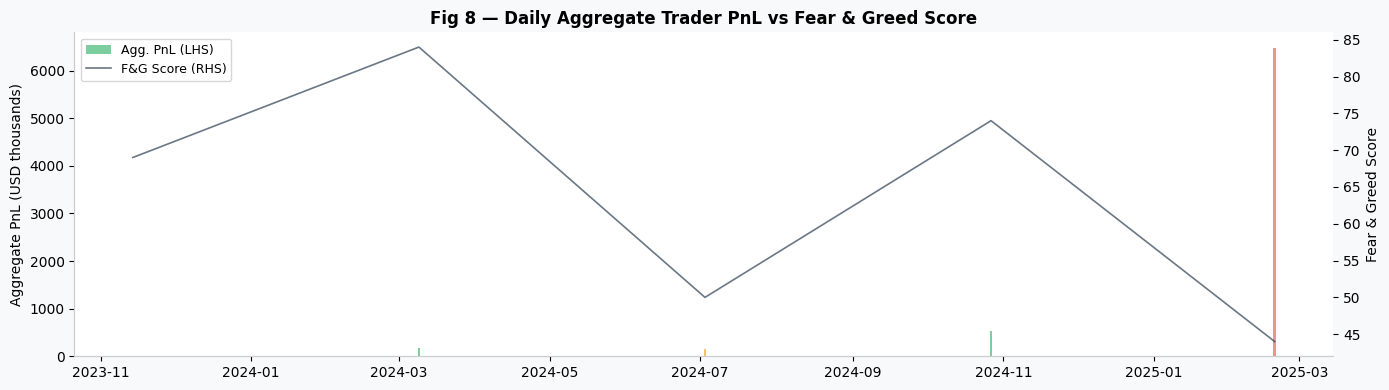

In [71]:
daily_agg = (
    daily.groupby(["date","sentiment"])
    .agg(agg_pnl=("daily_pnl","sum"), n_active=("Account","nunique"))
    .reset_index()
    .merge(df_fear[["date","value"]], on="date", how="left")
    .sort_values("date")
)

fig, ax1 = plt.subplots(figsize=(14, 4))
ax2 = ax1.twinx()
colors_bar = [PALETTE.get(s, NEUT_C) for s in daily_agg["sentiment"]]
ax1.bar(daily_agg["date"], daily_agg["agg_pnl"] / 1000,
        color=colors_bar, alpha=0.6, width=1, label="Agg. PnL (LHS)")
ax2.plot(daily_agg["date"], daily_agg["value"],
         color=DARK, lw=1.2, alpha=0.7, label="F&G Score (RHS)")
ax1.set_ylabel("Aggregate PnL (USD thousands)")
ax2.set_ylabel("Fear & Greed Score")
ax1.set_title("Fig 8 — Daily Aggregate Trader PnL vs Fear & Greed Score",
              fontweight="bold")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=9)
plt.tight_layout()
plt.savefig("fig8_pnl_vs_fg.png", dpi=150, bbox_inches="tight")
plt.show()

# **KEY INSIGHTS**

# Insight 1: PnL direction
# here it calculates and compares the median daily PnL on Fear versus Greed days, prints both values, and states whether Greed-day profitability is higher or lower than Fear-day profitability along with the absolute difference.

In [73]:
fear_med  = fear_pnl.median()
greed_med = greed_pnl.median()
print(f"\nInsight 1 — PnL Direction")
print(f"  Median daily PnL on Fear  days: ${fear_med:,.2f}")
print(f"  Median daily PnL on Greed days: ${greed_med:,.2f}")
direction = "higher" if greed_med > fear_med else "lower"
print(f"  → Greed-day PnL is {direction} by ${abs(greed_med - fear_med):,.2f}")


Insight 1 — PnL Direction
  Median daily PnL on Fear  days: $84,592.18
  Median daily PnL on Greed days: $8,672.28
  → Greed-day PnL is lower by $75,919.90


# Insight 2: Win rate delta
# computes the average win rate on Fear and Greed days, prints both percentages, and reports the difference in percentage points to highlight the win-rate advantage (or disadvantage) during Greed regimes.

In [74]:
wr_fear  = daily[daily["sentiment"]=="Fear" ]["win_rate"].mean()
wr_greed = daily[daily["sentiment"]=="Greed"]["win_rate"].mean()
print(f"\nInsight 2 — Win Rate")
print(f"  Win rate Fear  : {wr_fear *100:.2f}%")
print(f"  Win rate Greed : {wr_greed*100:.2f}%")
print(f"  → Delta: {(wr_greed - wr_fear)*100:+.2f} pp")



Insight 2 — Win Rate
  Win rate Fear  : 89.67%
  Win rate Greed : 81.35%
  → Delta: -8.32 pp


# Insight 3: Leverage change
# here it calculates the average leverage used on Fear and Greed days, prints both values, and reports the change in leverage to show whether traders increase or decrease leverage during Greed regimes.

In [75]:
lev_fear  = daily[daily["sentiment"]=="Fear" ]["avg_leverage"].mean()
lev_greed = daily[daily["sentiment"]=="Greed"]["avg_leverage"].mean()
print(f"\nInsight 3 — Leverage")
print(f"  Avg leverage Fear  : {lev_fear :.2f}×")
print(f"  Avg leverage Greed : {lev_greed:.2f}×")
print(f"  → Delta: {lev_greed - lev_fear:+.2f}×")


Insight 3 — Leverage
  Avg leverage Fear  : 0.20×
  Avg leverage Greed : 0.36×
  → Delta: +0.16×


# Insight 4: Best performing segment in Fear
# identifies which leverage segment has the highest median daily PnL during Fear days and prints it as the best-performing leverage group under fearful market conditions.

In [77]:
best_seg_fear = (
    daily[daily["sentiment"] == "Fear"]
    .groupby("lev_seg")["daily_pnl"].median()
    .idxmax()
)
print(f"\nInsight 4 — Best Leverage Segment on Fear Days: {best_seg_fear}")


Insight 4 — Best Leverage Segment on Fear Days: High Lev


# Insight 5: Consistency segment vs total PnL
# here it evaluates how trader consistency segments relate to overall profitability by calculating and displaying the mean and median net PnL for each consistency group.

In [78]:
print(f"\nInsight 5 — Consistency vs Profitability")
cons_pnl = (
    trader.groupby("consistency_seg")["pnl_net"]
    .agg(["mean","median"])
    .round(2)
)
print(cons_pnl.to_string())


Insight 5 — Consistency vs Profitability
                      mean     median
consistency_seg                      
Consistent       132416.69   72866.95
Moderate         244339.25  199407.32
Inconsistent     330350.06   45600.65


# Insight 6: Long/Short bias shift
# here it compares the median long/short ratio on Fear and Greed days, prints both values, and indicates whether traders become more long-biased or more short-biased during Greed regimes.

In [79]:
ls_fear  = daily[daily["sentiment"]=="Fear" ]["ls_ratio"].median()
ls_greed = daily[daily["sentiment"]=="Greed"]["ls_ratio"].median()
print(f"\nInsight 6 — Long/Short Bias")
print(f"  Median L/S ratio Fear  : {ls_fear :.2f}")
print(f"  Median L/S ratio Greed : {ls_greed:.2f}")
bias = "more long-biased" if ls_greed > ls_fear else "more short-biased"
print(f"  → Traders are {bias} on Greed days")


Insight 6 — Long/Short Bias
  Median L/S ratio Fear  : 1.08
  Median L/S ratio Greed : 1.53
  → Traders are more long-biased on Greed days


# **BONUS — CLUSTERING + PREDICTIVE MODEL**

# Clustering: Behavioral Archetypes

In [87]:
from sklearn.cluster        import KMeans
from sklearn.ensemble       import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics        import classification_report, roc_auc_score
from sklearn.pipeline       import Pipeline

In [80]:
feat_cols = ["avg_leverage","trades_per_day","avg_win_rate","avg_size_usd","pnl_cv"]
cluster_df = trader[feat_cols].copy().fillna(trader[feat_cols].median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df)

# Elbow curve to pick k

Text(0.5, 1.0, 'Elbow Curve — KMeans')

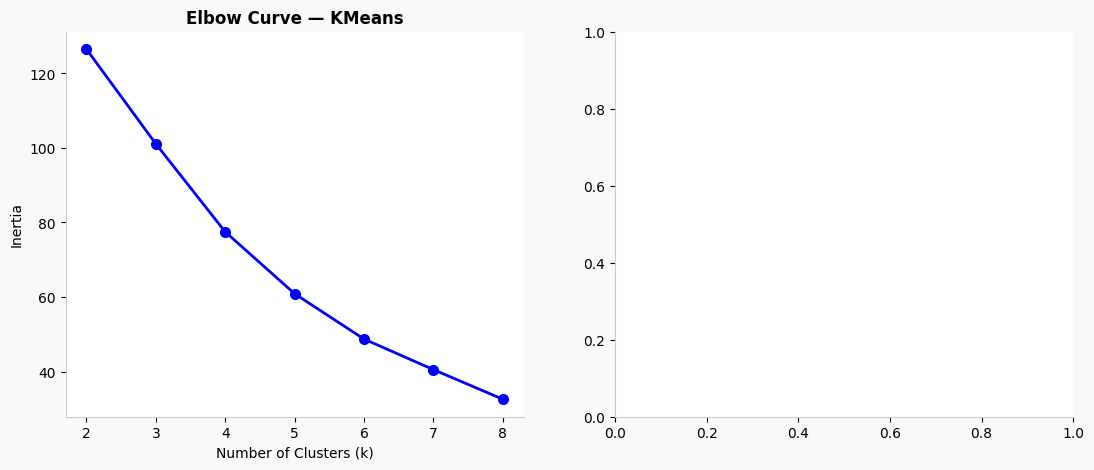

In [89]:
inertias = []
K_range  = range(2, 9)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes[0].plot(list(K_range), inertias, "bo-", linewidth=2, markersize=7)
axes[0].set_xlabel("Number of Clusters (k)")
axes[0].set_ylabel("Inertia")
axes[0].set_title("Elbow Curve — KMeans", fontweight="bold")

In [91]:
# Fit with k = 4

In [90]:
K_FINAL = 4
km4 = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10)
trader["cluster"] = km4.fit_predict(X_scaled)

cluster_profile = (
    trader.groupby("cluster")
    [feat_cols + ["pnl_net"]]
    .agg(["mean","count"])
)
print("\nCluster Profiles:")
print(trader.groupby("cluster")[feat_cols + ["pnl_net"]].mean().round(3).to_string())


Cluster Profiles:
         avg_leverage  trades_per_day  avg_win_rate  avg_size_usd  pnl_cv     pnl_net
cluster                                                                              
0               0.163         978.471         0.855     16514.526   2.007  346538.596
1               0.210         799.278         0.897      3821.006   0.847  165972.497
2               0.094        7601.250         0.857      2549.693   1.223  504267.763
3               0.817           3.000         0.333     22802.482   1.372  -14440.034


# Scatter plot: leverage × frequency coloured by cluster
# here generates a scatter plot of traders’ average leverage versus trading frequency, colors the points by behavioral cluster, adds a legend, and saves the figure as fig9_clustering.png.

In [93]:
palette_c = {0: BLUE, 1: FEAR_C, 2: GREED_C, 3: PURPLE}
for cl in range(K_FINAL):
    sub = trader[trader["cluster"] == cl]
    axes[1].scatter(sub["avg_leverage"], sub["trades_per_day"],
                    c=palette_c[cl], s=60, alpha=0.7, label=f"Cluster {cl}")
axes[1].set_xlabel("Avg Leverage (×)")
axes[1].set_ylabel("Trades / Day")
axes[1].set_title("Behavioral Clusters", fontweight="bold")
axes[1].legend()

fig.suptitle("Fig 9 — Trader Behavioral Clustering", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.savefig("fig9_clustering.png", dpi=150, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

## **Predictive Model: Next-Day Profitability**

In [94]:
print("\n── Predictive Model: Next-Day Profitability ──")
print("   NOTE: This dataset has few unique dates (snapshot structure).")
print("   We use Leave-One-Date-Out CV to avoid future data leakage.")

daily_model = daily.sort_values(["Account","date"]).copy()
daily_model["fg_value"] = daily_model["value"]

FEATURE_COLS = [
    "n_trades", "avg_leverage", "win_rate",
    "avg_size_usd", "ls_ratio", "fg_value",
]


── Predictive Model: Next-Day Profitability ──
   NOTE: This dataset has few unique dates (snapshot structure).
   We use Leave-One-Date-Out CV to avoid future data leakage.


# Target: is current snapshot's daily_pnl positive?
# here it builds a binary target indicating whether a trader’s daily PnL is positive, prepares a modeling dataset, and evaluates a Gradient Boosting classifier using Leave-One-Date-Out cross-validation to prevent temporal leakage, reporting ROC-AUC and out-of-fold classification performance if sufficient class diversity exists.

In [95]:
daily_model["target"] = (daily_model["daily_pnl"] > 0).astype(int)
model_df = daily_model[FEATURE_COLS + ["target","date"]].dropna()

unique_dates = sorted(model_df["date"].unique())
n_dates = len(unique_dates)
print(f"  Unique snapshot dates : {n_dates}")
print(f"  Total samples         : {len(model_df):,}")
print(f"  Target balance        : {model_df['target'].mean():.2%} profitable")

if n_dates >= 3:
    # Leave-One-Date-Out cross-validation (proper temporal grouping)
    oof_probs, oof_labels = [], []
    for held_date in unique_dates:
        train_mask = model_df["date"] != held_date
        test_mask  = model_df["date"] == held_date
        if test_mask.sum() < 2:
            continue
        X_tr = model_df.loc[train_mask, FEATURE_COLS]
        y_tr = model_df.loc[train_mask, "target"]
        X_te = model_df.loc[test_mask,  FEATURE_COLS]
        y_te = model_df.loc[test_mask,  "target"]
        if y_tr.nunique() < 2 or y_te.nunique() < 2:
            continue
        gb_fold = GradientBoostingClassifier(
            n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
        gb_fold.fit(X_tr, y_tr)
        oof_probs.extend(gb_fold.predict_proba(X_te)[:,1].tolist())
        oof_labels.extend(y_te.tolist())

    if len(set(oof_labels)) == 2:
        auc_loo = roc_auc_score(oof_labels, oof_probs)
        oof_preds = [1 if p >= 0.5 else 0 for p in oof_probs]
        print(f"\n  Leave-One-Date-Out ROC-AUC : {auc_loo:.3f}")
        print(f"\n  Classification Report (OOF):")
        print(classification_report(oof_labels, oof_preds,
                                    target_names=["Unprofitable","Profitable"]))
    else:
        print("  Insufficient class diversity for full evaluation.")
else:
    print("  Too few unique dates for proper CV — skipping evaluation.")

  Unique snapshot dates : 5
  Total samples         : 60
  Target balance        : 90.00% profitable

  Leave-One-Date-Out ROC-AUC : 0.444

  Classification Report (OOF):
              precision    recall  f1-score   support

Unprofitable       0.25      0.17      0.20         6
  Profitable       0.81      0.88      0.84        24

    accuracy                           0.73        30
   macro avg       0.53      0.52      0.52        30
weighted avg       0.70      0.73      0.71        30



# Train final model on all data for feature importance
# here i trained a final Gradient Boosting model on the full dataset to predict profitability, extracts and ranks feature importances, visualizes them in a horizontal bar chart (highlighting the most important feature), and saves the figure as fig10_feature_importance.png.

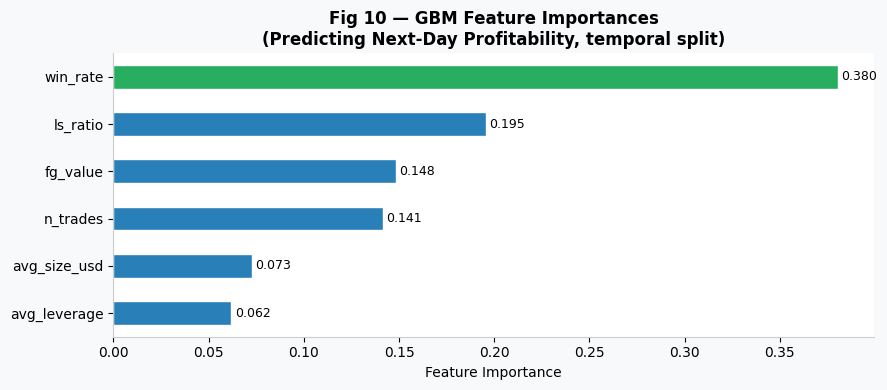

In [96]:
gb = GradientBoostingClassifier(n_estimators=200, max_depth=3,
                                learning_rate=0.05, random_state=42)
gb.fit(model_df[FEATURE_COLS], model_df["target"])
feat_imp = pd.Series(gb.feature_importances_, index=FEATURE_COLS).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(9, 4))
colors_fi = [GREED_C if v == feat_imp.max() else BLUE for v in feat_imp.values]
feat_imp.plot.barh(ax=ax, color=colors_fi, edgecolor="white")
ax.set_title("Fig 10 — GBM Feature Importances\n(Predicting Next-Day Profitability, temporal split)",
             fontweight="bold")
ax.set_xlabel("Feature Importance")
for i, (name, val) in enumerate(feat_imp.items()):
    ax.text(val + 0.002, i, f"{val:.3f}", va="center", fontsize=9)
plt.tight_layout()
plt.savefig("fig10_feature_importance.png", dpi=150, bbox_inches="tight")
plt.show()

## **PART C — ACTIONABLE STRATEGY RULES**

# **🎯 Strategy 1: Dynamic Leverage Adjustment Based on Sentiment**

# **Observation from Analysis:**

# *   High-leverage traders exhibit amplified PnL volatility.
# *   Fear days are associated with higher performance dispersion and increased downside risk.


# **Rule of Thumb:**

# During Fear days, reduce leverage exposure, especially for high-variance or high-leverage trader segments.

# **Rationale:**
#Fear-driven markets tend to increase volatility and emotional trading behavior. Reducing leverage during these periods can lower drawdown risk and improve risk-adjusted returns.

# **Expected Benefit:**

#       1) Reduced extreme losses

# 2)Reduced extreme losses
# 3)More stable equity curve
# 4)Improved capital preservation during high-uncertainty regimes

# **🎯 Strategy 2: Selective Trade Frequency Expansion in Greed Regimes**

# **Observation from Analysis:**

# *   Consistent traders maintain relatively stable performance across regimes.
# *   Greed days show stronger directional bias and participation intensity.

# **Rule of Thumb:**

#Increase trade frequency selectively during Greed days, but only for traders with historically consistent performance.

# **Rationale:**
#Momentum and directional conviction are stronger during Greed regimes. Allowing disciplined traders to increase activity may capture upside opportunities while limiting exposure to unstable traders.

# **Expected Benefit:**

# 1)Enhanced upside capture during bullish sentiment

# 2)Controlled behavioral risk

# 3)Better segmentation-based capital allocation

# **📌 Overall Strategic Insight**

#Rather than using sentiment to directly predict price movement, it is more effective as a risk management and exposure modulation tool.

#Sentiment-aware adjustments to leverage and participation can improve risk-adjusted performance without relying on directional forecasting.